<a href="https://colab.research.google.com/github/AnanyaKodali/MAT-494/blob/main/3_4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**3.4.1 Logistic Regression**

**Definition 3.4.1**

Logistic Regression is a statistical method for modeling the probability of a binary dependent variable based on one or more independent variables. Unlike linear regression, which outputs continuous values, logistic regression uses the logistic (sigmoid) function to map predictions to probabilities between 0 and 1. This makes it ideal for classification tasks where the goal is to assign instances to discrete classes.

Formally, logistic regression models the probability $p$ of the dependent variable $y=1$ as:
* $p = \sigma(\mathbf{\alpha}^T \mathbf{x}) = \frac{1}{1 + e^{-\mathbf{\alpha}^T \mathbf{x}}}$

Where,
* $\mathbf{x} \in \mathbb{R}^d$ is the feature vector
* $\mathbf{\alpha} \in \mathbb{R}^d$ are the model coeffecients
* $\sigma(t)$ is the sigmoid function

Logistic regression can be extended to multiclass classification using Softmax Regression, which generalizes the logistic function to handle multiple classes.


**Example 3.4.1: Centralized Dataset**

For practical implementations across all subsections, we will analyze and implement logistic regression on the following datasets:
1. Synthetic Data: Generated for binary classification to illustrate fundamental concepts.
2. MNIST Digits: A well-known dataset for multiclass classification tasks.
3. Insurance Dataset: An example of real-world data for binary classification

**Definition 3.4.2**

*Logistic Function*

The logistic function models the relationship between the input features and the probability of the binary outcome. It is defined as:
* $\log\left(\frac{p}{1 - p}\right) = \mathbf{\alpha}^T \mathbf{x}$

Where,
* $p$ is the probability of $y = 1$ given input $\mathbf{x}$
* $\mathbf{\alpha}$ are the coefficients of the model

**Definition 3.4.3**

*Sigmoid Function*

The sigmoid function transforms the linear combination of inputs into a probability between 0 and 1:
* $\sigma(t) = \frac{1}{1 + e^{-t}}$

*Properties*
1. Range: $(0, 1)$
2. S-shape: Smooth and differentiable.
3. Monotonic: Strictly increasing

The sigmoid function ensures that the output of logistic regression is interpretable as a probability.

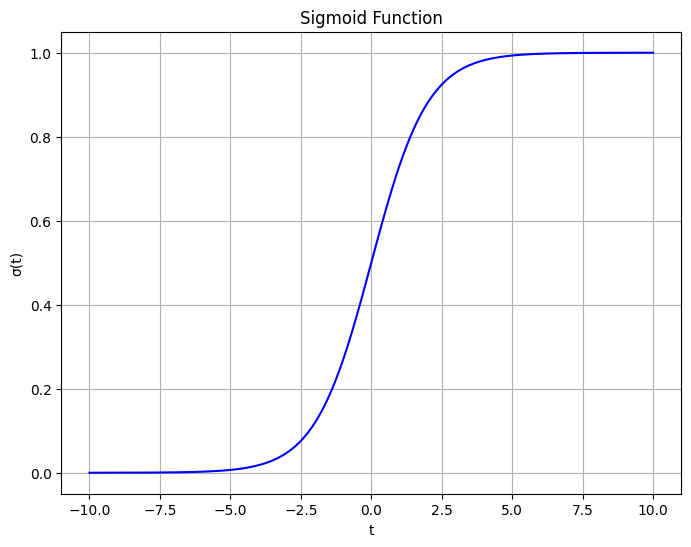

In [11]:
# Visualization of Sigmoid Function

import numpy as np
import matplotlib.pyplot as plt

def sigmoid_plot(t):
    return 1 / (1 + np.exp(-t))

# Define range of t values
t_vals = np.linspace(-10, 10, 400)
sigmoid_vals = sigmoid_plot(t_vals)

plt.figure(figsize=(8, 6))
plt.plot(t_vals, sigmoid_vals, color='blue')
plt.title("Sigmoid Function")
plt.xlabel("t")
plt.ylabel("σ(t)")
plt.grid(True)
plt.show()

**Definition 3.4.4**

*Cross-Entropy Loss*

The cross-entropy loss measures the performance of a classification model whose output is a probability between 0 and 1. It quantifies the difference between the true labels and the predicted probabilities.

For binary classification, the cross-entropy loss $L(α)$ is defined as:
* $L(\mathbf{\alpha}) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]$

Where,
* $n$ is the number of samples
* $y_i \in \{0, 1\}$ is the true label
* $p_i$ is the predicted probability $p_i = \sigma(\mathbf{\alpha}^T \mathbf{x}_i)$

Minimizing the cross-entropy loss aligns the predicted probabilities with the true labels.





## Gradient Descent for Optimization

**Definition 3.4.5**

Gradient Descent is an iterative optimization algorithm used to minimize the loss function by updating the model coefficients in the direction of the steepest descent.

Update Rule: $\mathbf{\alpha}_{t+1} = \mathbf{\alpha}_t - \eta \nabla L(\mathbf{\alpha}_t)$

Where,
* $\mathbf{\alpha}_t$ are the coefficients at iteration $t$
* $\eta$ is the learning rate
* $\nabla L(\mathbf{\alpha}_t)$ is the gradient of the loss function with respect to $\mathbf{\alpha}$ at iteration $t$

**Mathematical Intuition 3.4.6**

*Gradient Calculation*

For logistic regression, the gradient of the cross-entropy loss with respect to $\mathbf{\alpha}$ is:
* $\nabla L(\mathbf{\alpha}) = \frac{1}{n} \sum_{i=1}^{n} (p_i - y_i) \mathbf{x}_i$

Updating the coefficients using gradient descent iteratively reduces the loss, guiding the model towards optimal parameters.


**Example 3.4.2: Logistic Regression with Scikit-Learn**

Objective: Implement  logistic regression using Scikit-Learn,  as a baseline to understand the algorithm's functionality and performance.

Intercept: [-3.96861054]
Coefficient: [[0.8648844]]
Predicted classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted probabilities:
 [[0.9814509  0.0185491 ]
 [0.97979174 0.02020826]
 [0.9779875  0.0220125 ]
 [0.97602612 0.02397388]
 [0.97389464 0.02610536]
 [0.97157916 0.02842084]
 [0.96906484 0.03093516]
 [0.96633579 0.03366421]
 [0.96337508 0.03662492]
 [0.96016472 0.03983528]
 [0.95668561 0.04331439]
 [0.95291754 0.04708246]
 [0.9488392  0.0511608 ]
 [0.9444282  0.0555718 ]
 [0.93966107 0.06033893]
 [0.93451335 0.06548665]
 [0.92895967 0.07104033]
 [0.92297382 0.07702618]
 [0.91652892 0.08347108]
 [0.90959759 0.09040241]
 [0.90215214 0.09784786]
 [0.89416483 0.10583517]
 [0.8856082  0.1143918 ]
 [0.87645535 0.12354465]
 [0.86668041 0.13331959]
 [0.8562589  0.1437411 ]
 [0.84516829 0.15483171]
 [0.83338846 0.16661154]

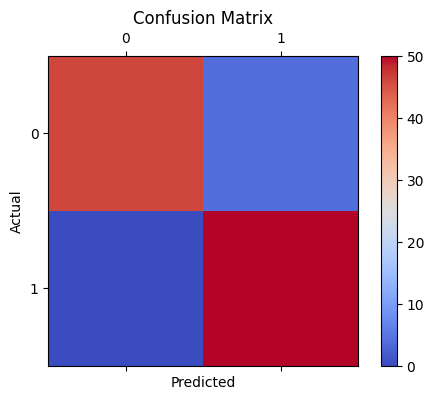

In [1]:
# Logistic Regression using Scikit-Learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Centralized Dataset: Binary classification example
# Generating synthetic data
np.random.seed(0)
x = np.linspace(0, 10, 100).reshape(-1, 1)
y = (x.flatten() > 5).astype(int)  # Labels: 0 if x <= 5, 1 if x > 5

# Create Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

# Predictions and probabilities
predicted_classes = model.predict(x)
predicted_probs = model.predict_proba(x)

# Accuracy
accuracy = model.score(x, y)

# Print results
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)
print("Predicted classes:", predicted_classes)
print("Predicted probabilities:\n", predicted_probs)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y, predicted_classes)
plt.figure(figsize=(6, 4))
plt.matshow(cm, cmap='coolwarm', fignum=1)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

*Code Analysis*

1. Data Generation: A synthetic dataset is created with 100 samples where $𝑥$ ranges from 0 to 10. Labels $𝑦$ are assigned based on whether
$𝑥$ is greater than 5.
2. Model Training: A LogisticRegression model is instantiated with the liblinear solver suitable for small datasets. The model is trained using the .fit() method.
3. Predictions: The trained model predicts class labels and probabilities for each sample. The overall accuracy is computed.
4. Results: The intercept and coefficients of the model are printed. The confusion matrix visualizes the model's performance.

**Example 3.4.3: Logistic Regression on MNIST Digits**

Objective: Applying  logistic regression to the MNIST digits dataset, a classic multiclass classification problem.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy on MNIST test set: 0.975

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



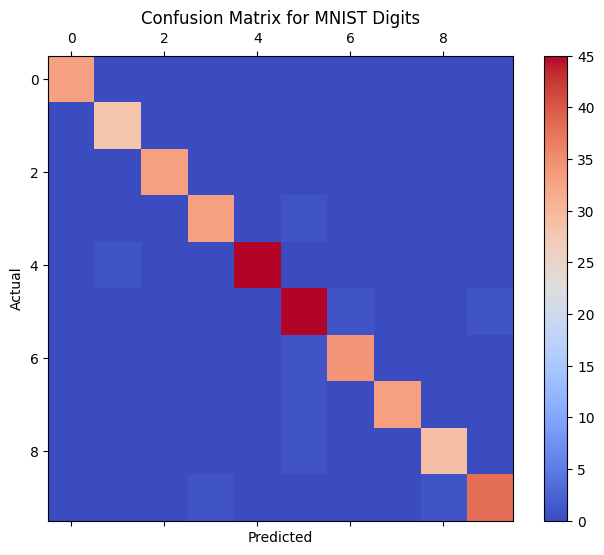

In [2]:
# Logistic Regression on MNIST Digits

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Train Logistic Regression for multiclass classification
logisticRegr = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
logisticRegr.fit(x_train, y_train)

# Predictions and performance
y_pred = logisticRegr.predict(x_test)
accuracy = logisticRegr.score(x_test, y_test)

print("Accuracy on MNIST test set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.matshow(cm, cmap='coolwarm', fignum=1)
plt.title("Confusion Matrix for MNIST Digits")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

*Code Analysis*

1. Data Loading: The MNIST digits dataset is loaded using load_digits(). The dataset is split into training and testing sets using train_test_split.
2. Model Training: A LogisticRegression model is instantiated with the lbfgs solver suitable for multiclass problems. The model is trained on the training data.
3. Predictions and Evaluation: The trained model predicts class labels for the test set. The overall accuracy and detailed classification metrics are printed.
A confusion matrix visualizes the model's performance across different digit classes.

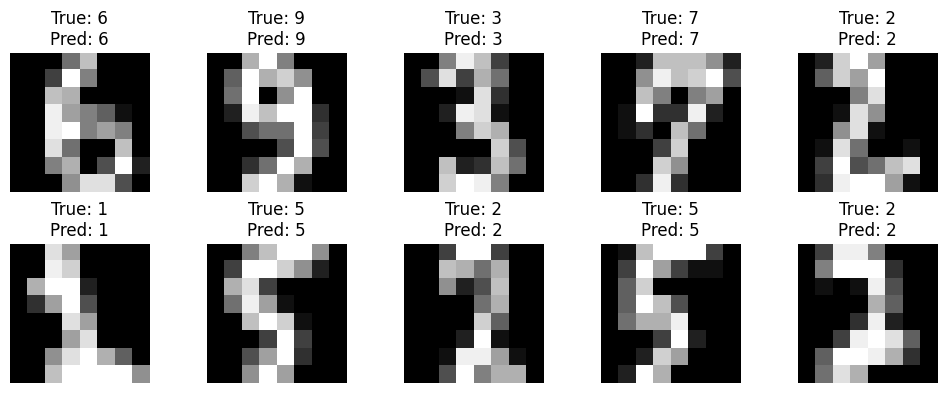

In [14]:
# Visualization of Multiclass Logistic Regression Performance on MNIST

import matplotlib.pyplot as plt

# Select a subset of test samples to visualize
num_samples = 10
plt.figure(figsize=(10, 4))
for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**Example 3.4.4: Custom Logistic Regression Implementation**

**Example 3.4.4: Sigmoid and Cross-Entropy Loss**

In [3]:
# Sigmoid and Cross-Entropy Loss Implementation

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y, p):
    """Compute the cross-entropy loss."""
    # To prevent log(0), clip p to [1e-15, 1 - 1e-15]
    p = np.clip(p, 1e-15, 1 - 1e-15)
    return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))


**Example 3.4.4: Synthetic Dataset (Binary)**

In [4]:
# Synthetic Dataset Generation

np.random.seed(42)
# Generate 100 samples with one feature
x = np.random.rand(100, 1) * 10  # Features range from 0 to 10
# Labels: 0 if x <= 5, 1 if x > 5
y = (x.flatten() > 5).astype(int)

**Example 3.4.4: Model Parameters Initialization (Weights,Bias)**

In [6]:
# Model Parameters Initialization

weights = np.zeros(x.shape[1])  # Initialize weights to zero
bias = 0.0
learning_rate = 0.01
epochs = 1000

**Example 3.4.4: Training Logistic Regression Using Gradient Descent**

In [7]:
# Training Logistic Regression from Scratch

for epoch in range(epochs):
    # Linear combination
    linear_model = np.dot(x, weights) + bias
    # Prediction using sigmoid
    predictions = sigmoid(linear_model)
    # Compute loss
    loss = cross_entropy_loss(y, predictions)

    # Compute gradients
    dw = np.dot(x.T, (predictions - y)) / y.size
    db = np.sum(predictions - y) / y.size

    # Update parameters
    weights -= learning_rate * dw
    bias -= learning_rate * db

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss:.4f}")

print("\nTrained weights:", weights)
print("Trained bias:", bias)

Epoch 100: Loss = 0.5661
Epoch 200: Loss = 0.5300
Epoch 300: Loss = 0.4983
Epoch 400: Loss = 0.4702
Epoch 500: Loss = 0.4454
Epoch 600: Loss = 0.4234
Epoch 700: Loss = 0.4038
Epoch 800: Loss = 0.3862
Epoch 900: Loss = 0.3705
Epoch 1000: Loss = 0.3562

Trained weights: [0.42369853]
Trained bias: -1.512430433211711


**Example 3.4.4: Making Predictions**


Accuracy on training data: 0.89


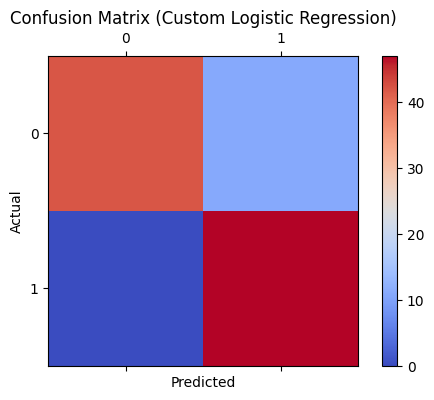

In [8]:
# Making Predictions with Trained Model

# Compute predictions
linear_model = np.dot(x, weights) + bias
predictions = sigmoid(linear_model)
# Classify as 1 if probability >= 0.5, else 0
predicted_classes = (predictions >= 0.5).astype(int)

# Compute accuracy
accuracy = np.mean(predicted_classes == y)
print("\nAccuracy on training data:", accuracy)

# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, predicted_classes)
plt.figure(figsize=(6, 4))
plt.matshow(cm, cmap='coolwarm', fignum=1)
plt.title("Confusion Matrix (Custom Logistic Regression)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Example 3.4.4: Visualizing the Logistic Regression Fit**

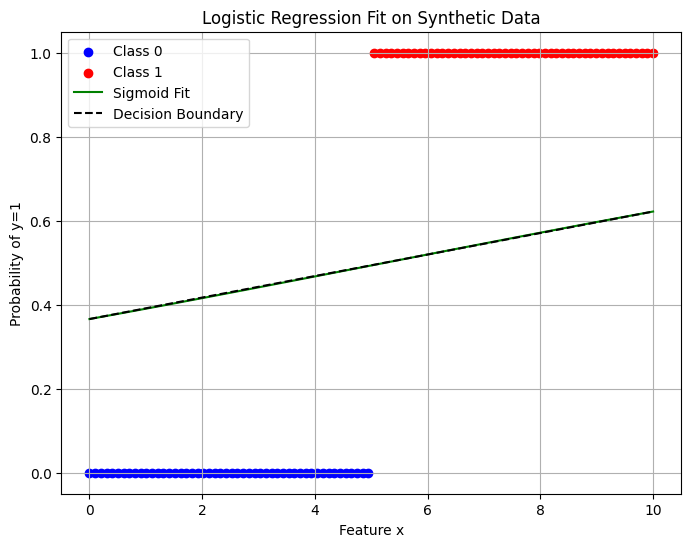

In [13]:
# Visualization of Logistic Regression Fit on Synthetic Data

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(t):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-t))

# Assume these are obtained from your trained model
weights = np.array([0.10474554])  # Shape: (1,)
bias = -0.5498648250742807       # Scalar

# Centralized Dataset: Binary classification example
# Generating synthetic data
np.random.seed(0)
x = np.linspace(0, 10, 100).reshape(-1, 1)
y = (x.flatten() > 5).astype(int)  # Labels: 0 if x <= 5, 1 if x > 5

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x[y == 0], y[y == 0], color='blue', label='Class 0')
plt.scatter(x[y == 1], y[y == 1], color='red', label='Class 1')

# Plot the sigmoid curve
linear_model = np.dot(x, weights) + bias  # Shape: (100, 1)
probabilities = sigmoid(linear_model)     # Shape: (100, 1)
plt.plot(x, probabilities, color='green', label='Sigmoid Fit')

# Compute and plot the decision boundary
x_boundary = np.array([x.min(), x.max()])           # Shape: (2,)
y_boundary = sigmoid(weights[0] * x_boundary + bias)  # Shape: (2,)
plt.plot(x_boundary, y_boundary, color='black', linestyle='--', label='Decision Boundary')

plt.xlabel('Feature x')
plt.ylabel('Probability of y=1')
plt.title('Logistic Regression Fit on Synthetic Data')
plt.legend()
plt.grid(True)
plt.show()

## Regularization

**Definition 3.4.7**

Regularization techniques are employed to prevent overfitting by adding a penalty term to the loss function.

1. L1 Regularization (Lasso): Adds the absolute value of coefficients as a penalty term:
 * $L(\mathbf{\alpha}) + \lambda \sum_{j=1}^{d} |\alpha_j|$
2. L2 Regularization (Ridge): Adds the squared value of coefficients as a penalty term:
 * $L(\mathbf{\alpha}) + \frac{\lambda}{2} \sum_{j=1}^{d} \alpha_j^2$

**Example 3.4.5: Regularization Implementation**

In [15]:
# Logistic Regression with L2 Regularization

from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model with L2 regularization (default)
model_l2 = LogisticRegression(solver='liblinear', penalty='l2', C=1.0, random_state=0)
model_l2.fit(x, y)

# Predictions and probabilities
predicted_classes_l2 = model_l2.predict(x)
predicted_probs_l2 = model_l2.predict_proba(x)
accuracy_l2 = model_l2.score(x, y)

# Print results
print("L2 Regularization:")
print("Intercept:", model_l2.intercept_)
print("Coefficient:", model_l2.coef_)
print("Accuracy:", accuracy_l2)

L2 Regularization:
Intercept: [-3.96861054]
Coefficient: [[0.8648844]]
Accuracy: 0.96


## Multiclass Logistic Regression (Softmax)

**Definition 3.4.8**

For multiclass classification, the Softmax Regression generalizes logistic regression by modeling the probability distribution over multiple classes using the softmax function.
* $P(y = i \mid \mathbf{x}) = \frac{e^{\mathbf{\alpha}_i^T \mathbf{x}}}{\sum_{j=1}^{K} e^{\mathbf{\alpha}_j^T \mathbf{x}}}$

Where,
* $K$ is the number of classes
* $\mathbf{\alpha}_i$ are the coefficients for class $i$

**Example 3.4.5: Softmax Implementation**

In [16]:
# Multiclass Logistic Regression using Softmax

# The 'multi_class' parameter set to 'multinomial' and 'solver' to 'lbfgs' enable softmax
logisticRegr = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
logisticRegr.fit(x_train, y_train)

# Predictions and performance
y_pred_softmax = logisticRegr.predict(x_test)
accuracy_softmax = logisticRegr.score(x_test, y_test)

print("Multiclass Logistic Regression Accuracy on MNIST test set:", accuracy_softmax)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Multiclass Logistic Regression Accuracy on MNIST test set: 0.975


## Stochastic Gradient Descent

**Definition 3.4.9**

Stochastic Gradient Descent (SGD) updates the model coefficients using one sample at a time, which can lead to faster convergence on large datasets.

Update Rule: $\mathbf{\alpha}_{t+1} = \mathbf{\alpha}_t - \eta (y^{(i)} - \hat{y}^{(i)}) \mathbf{x}^{(i)}$

Where,
* $y^{(i)}$ is the true label for sample $i$
* $\hat{y}^{(i)}$ is the predicted probability for sample $i$
* $\eta$ is the learning rate

Epoch 100: Loss = 0.1462
Epoch 200: Loss = 0.1124
Epoch 300: Loss = 0.0969
Epoch 400: Loss = 0.0875
Epoch 500: Loss = 0.0809
Epoch 600: Loss = 0.0759
Epoch 700: Loss = 0.0719
Epoch 800: Loss = 0.0686
Epoch 900: Loss = 0.0659
Epoch 1000: Loss = 0.0636

Trained weights (SGD): [2.67821922]
Trained bias (SGD): -12.97120317359015
SGD Accuracy on training data: 0.98


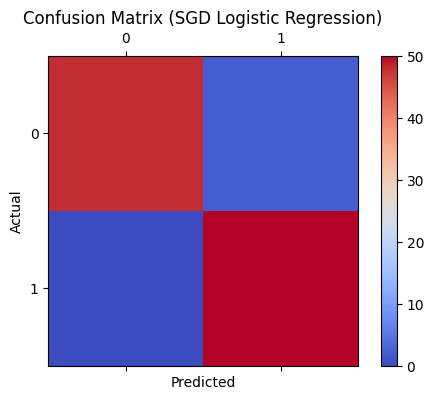

In [17]:
# Stochastic Gradient Descent Implementation

def stochastic_gradient_descent(x, y, learning_rate=0.01, epochs=1000, tol=1e-6):
    weights = np.zeros(x.shape[1])
    bias = 0.0
    n = x.shape[0]

    for epoch in range(epochs):
        loss = 0
        for i in range(n):
            linear_model = np.dot(x[i], weights) + bias
            prediction = sigmoid(linear_model)
            error = prediction - y[i]

            # Update weights and bias
            weights -= learning_rate * error * x[i]
            bias -= learning_rate * error

            # Accumulate loss
            loss += cross_entropy_loss(y[i:i+1], prediction)

        # Average loss
        loss /= n

        # Check for convergence
        if loss < tol:
            print(f"SGD converged in {epoch+1} epochs.")
            break

        # Print loss every 100 epochs
        if (epoch+1) % 100 == 0:
            print(f"Epoch {epoch+1}: Loss = {loss:.4f}")

    return weights, bias

# Perform Stochastic Gradient Descent on Synthetic Data
weights_sgd, bias_sgd = stochastic_gradient_descent(x, y, learning_rate=0.01, epochs=1000)
print("\nTrained weights (SGD):", weights_sgd)
print("Trained bias (SGD):", bias_sgd)

# Predictions using SGD-trained model
linear_model_sgd = np.dot(x, weights_sgd) + bias_sgd
predictions_sgd = sigmoid(linear_model_sgd)
predicted_classes_sgd = (predictions_sgd >= 0.5).astype(int)

# Compute accuracy
accuracy_sgd = np.mean(predicted_classes_sgd == y)
print("SGD Accuracy on training data:", accuracy_sgd)

# Confusion Matrix
cm_sgd = confusion_matrix(y, predicted_classes_sgd)
plt.figure(figsize=(6, 4))
plt.matshow(cm_sgd, cmap='coolwarm', fignum=1)
plt.title("Confusion Matrix (SGD Logistic Regression)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()